# Example CREEDS API Usages Walk-Through
### _Zichen Wang_


In [1]:
## required python packages
import json
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")

In [2]:
BASE_URL = 'http://amp.pharm.mssm.edu/CREEDS/'

## 1. Search signatures using text

The `/search` endpoint handles the search of the meta-data associated with gene expression signatures. You can use a query term of interest such as 'breast cancer' to perform search using HTTP GET request.

The `requests.get()` function perform HTTP GET request and return a response object. JSON data associated with the response object can be parsed using the `.json()` method.

In [3]:
r = requests.get(BASE_URL + 'search', params={'q':'breast cancer'})
response = r.json()
print r.status_code

200


We next convert the json response to a `pandas.DataFrame` and have a look at the search result 

In [4]:
response_df = pd.DataFrame.from_records(response).set_index('id')
response_df.head()

,cell_type,ctrl_ids,curator,disease_name,do_id,geo_id,organism,pert_ids,platform,umls_cui
id,,,,,,,,,,
dz:11,Mammary Epithelium,"[GSM1932, GSM1933, GSM1935, GSM1949, GSM1950, ...",Joel.Dudley,breast cancer,DOID:1612,GSE53,human,"[GSM1928, GSM1929, GSM1930, GSM1931, GSM1934, ...",GPL170,C0006142
dz:24,Mammary Gland Tissue,"[GSM85513, GSM85514, GSM85515, GSM85516, GSM85...",Joel.Dudley,breast cancer,DOID:1612,GSE3744,human,"[GSM85473, GSM85474, GSM85475, GSM85476, GSM85...",GPL570,C0006142
dz:28,Mammary gland,"[GSM48242, GSM48244, GSM48245]",Joel.Dudley,breast cancer,DOID:1612,GSE2528,mouse,"[GSM48236, GSM48237, GSM48238, GSM48239, GSM48...",GPL81,C0006142
dz:39,Epithelial Cell,"[GSM38895, GSM38896]",Joel.Dudley,breast cancer,DOID:1612,GSE2155,human,"[GSM38897, GSM38898, GSM38899, GSM38900, GSM38...",GPL1794,C0006142
dz:52,Mammary Gland Tissue,"[GSM22369, GSM22374, GSM22381, GSM22382, GSM22...",Joel.Dudley,breast cancer,DOID:1612,GSE1378,human,"[GSM22365, GSM22366, GSM22367, GSM22368, GSM22...",GPL1223,C0006142


## 2. Query the signature database using up/down gene sets to find similar/opposite signatures
Signatures can also be queried against using a pair of up/down gene lists from the `/search` endpoint using HTTP POST request. Here we generate vectors of up and down genes to query against the CREEDS database:

In [5]:
## Get some up and down gene lists 
up_genes = ['KIAA0907','KDM5A','CDC25A','EGR1','GADD45B','RELB','TERF2IP','SMNDC1','TICAM1','NFKB2','RGS2','NCOA3','ICAM1','TEX10','CNOT4','ARID4B','CLPX','CHIC2','CXCL2','FBXO11','MTF2','CDK2','DNTTIP2','GADD45A','GOLT1B','POLR2K','NFKBIE','GABPB1','ECD','PHKG2','RAD9A','NET1','KIAA0753','EZH2','NRAS','ATP6V0B','CDK7','CCNH','SENP6','TIPARP','FOS','ARPP19','TFAP2A','KDM5B','NPC1','TP53BP2','NUSAP1']
dn_genes = ['SCCPDH','KIF20A','FZD7','USP22','PIP4K2B','CRYZ','GNB5','EIF4EBP1','PHGDH','RRAGA','SLC25A46','RPA1','HADH','DAG1','RPIA','P4HA2','MACF1','TMEM97','MPZL1','PSMG1','PLK1','SLC37A4','GLRX','CBR3','PRSS23','NUDCD3','CDC20','KIAA0528','NIPSNAP1','TRAM2','STUB1','DERA','MTHFD2','BLVRA','IARS2','LIPA','PGM1','CNDP2','BNIP3','CTSL1','CDC25B','HSPA8','EPRS','PAX8','SACM1L','HOXA5','TLE1','PYGL','TUBB6','LOXL1']
payload = {
    'up_genes': up_genes,
    'dn_genes': dn_genes,
    'direction': 'similar'
    }

POST the input gene sets to the API and load the response to `pandas.DataFrame`

In [6]:
r = requests.post(BASE_URL + 'search', json=payload)
print r.status_code
response = r.json()

200


In [7]:
response_df = pd.DataFrame.from_records(response).set_index('id')
response_df.head()

,geo_id,name,signed_jaccard
id,,,
gene:2008,GSE8747,"[Met, http://www.ncbi.nlm.nih.gov/gene/17295]",0.00289
gene:84,GSE10516,"[Lmx1b, http://www.ncbi.nlm.nih.gov/gene/16917]",0.00251
gene:2314,GSE53388,"[Arhgap5, http://www.ncbi.nlm.nih.gov/gene/11855]",0.00207
gene:2916,GSE40377,"[Pde10a, http://www.ncbi.nlm.nih.gov/gene/23984]",0.00178
gene:601,GSE13590,"[MIR140, http://www.ncbi.nlm.nih.gov/gene/406932]",0.00162


## 3. Retrieve a signature using `id`

In [8]:
r = requests.get(BASE_URL + 'api', params={'id': response_df.index[0]})
sig = r.json()

`sig` is a python `dictionary` with the following keys

In [9]:
print sig.keys()

[u'cell_type', u'pert_ids', u'hs_gene_symbol', u'curator', u'id', u'geo_id', u'platform', u'ctrl_ids', u'up_genes', u'mm_gene_symbol', u'organism', u'down_genes', u'pert_type']


## 4. Retrieve a gene expression dataset from GEO and perform some analyses
### 4.0. Prepare data
Look at the meta-data required to retrieve dataset from GEO

In [10]:
print 'GEO id: %s' % sig['geo_id']
print 'Control GSMs: %s' % sig['ctrl_ids']
print 'Perturbation GSMs: %s' % sig['pert_ids']
print 'GEO platform id: %s' % sig['platform']

GEO id: GSE8747
Control GSMs: [u'GSM217200', u'GSM217202', u'GSM217204', u'GSM217206', u'GSM217208']
Perturbation GSMs: [u'GSM217210', u'GSM217214', u'GSM217215', u'GSM217217']
GEO platform id: GPL4200


In order to retrieve gene expression data from GEO, we need to use some custom utility functions than can be found at: https://github.com/MaayanLab/creeds/tree/master/externals. 

To identify Differentially Expressed Genes (DEGs), we use the [Charateristic Direction (CD)](http://bmcbioinformatics.biomedcentral.com/articles/10.1186/1471-2105-15-79) algorithm implemented in the [`geode` package](https://github.com/wangz10/geode)

In [11]:
from externals import (geodownloader, softparser, RNAseq)
import geode

In [12]:
gse_file = geodownloader.download(sig['geo_id'])
annot_file = geodownloader.download(sig['platform'])

In [13]:
expr_df = softparser.parse(gse_file.path(), sig['ctrl_ids'], sig['pert_ids'])
print expr_df.shape
expr_df.head()

(36607, 9)


,GSM217200,GSM217202,GSM217204,GSM217206,GSM217208,GSM217210,GSM217214,GSM217215,GSM217217
ID_REF,,,,,,,,,
1762437_1,0.789,0.353,0.562,-0.539,0.376,0.555,1.032,0.712,0.929
1762438_1,0.694,0.445,0.681,-0.648,0.296,0.373,0.775,0.783,0.750
1762439_1,0.741,0.240,0.569,-0.704,0.281,0.489,0.970,0.953,0.458
1762440_1,0.728,0.322,0.633,-0.623,0.170,0.392,0.706,0.530,0.543
1762441_1,0.613,0.380,0.703,-0.730,0.334,0.494,0.801,0.648,0.583


### 4.1. Explanatory analyses
Visualize the gene expression values across samples using density plot

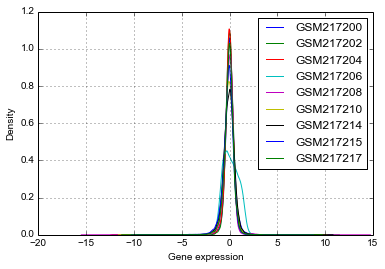

In [14]:
ax = expr_df.plot(kind='kde')
ax.set_xlabel('Gene expression')

Visualize using PCA plot

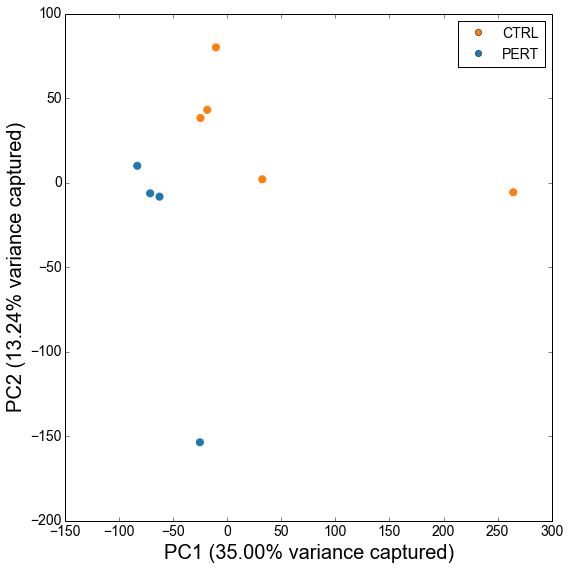

In [15]:
sample_classes = ['CTRL'] * len(sig['ctrl_ids']) + ['PERT'] * len(sig['pert_ids'])
RNAseq.PCA_plot(expr_df.values, sample_classes, log=True, standardize=2)

## 4.2. Perform differential expression analysis
### 4.2.1. Applying the Characteristic Direcion (CD) algorithm

In [16]:
sample_classes = [1] * len(sig['ctrl_ids']) + [2] * len(sig['pert_ids'])
result = geode.chdir(expr_df.values, sample_classes, expr_df.index,
                    gamma=.5, sort=False)
result = pd.DataFrame(result, columns=['CD_coefficient', 'probes'])
result.head()

,CD_coefficient,probes
0,0.004705,1762437_1
1,0.002536,1762438_1
2,0.004283,1762439_1
3,0.002002,1762440_1
4,0.002548,1762441_1
